In [1]:
import cell_segmentation as cellseg
import io
import base64
from IPython.display import HTML
from skimage import io as sio
from skimage import exposure
import numpy as np
import os
import matplotlib.pyplot as plt
import ast
import pandas as pd
import seaborn as sns
%matplotlib inline


/Users/sarahkeegan/anaconda/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
dir_ = "/Users/sarahkeegan/fenyolab/data_and_results/pagano/rona/TIF/FOR_SARAH_WT_stacked/"
image_stack_pcna = sio.imread(dir_ + 'sample_09_PCNA.tif')
image_stack_cyd1 = sio.imread(dir_ + 'sample_09_CYD1.tif')
color_stack = np.stack((image_stack_pcna,image_stack_cyd1,np.zeros(shape=image_stack_pcna.shape, dtype=image_stack_pcna.dtype)),axis=-1)
color_stack2 = np.stack((image_stack_pcna,np.zeros(shape=image_stack_pcna.shape, dtype=image_stack_pcna.dtype),np.zeros(shape=image_stack_pcna.shape, dtype=image_stack_pcna.dtype)),axis=-1)
color_stack2 = np.stack((np.zeros(shape=image_stack_pcna.shape, dtype='uint8'),
                         np.zeros(shape=image_stack_pcna.shape, dtype='uint8'),
                         np.zeros(shape=image_stack_pcna.shape, dtype='uint8')),axis=-1)


tile_number=2

/Users/sarahkeegan/anaconda/lib/python2.7/site-packages/skimage/io/_plugins/matplotlib_plugin.py:74: UserWarning: Low image dynamic range; displaying image with stretched contrast.
  warn("Low image dynamic range; displaying image with "


/Users/sarahkeegan/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


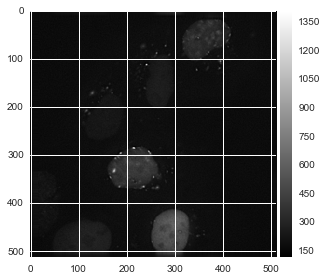

In [3]:
sio.imshow(image_stack_pcna[tile_number], cmap=plt.cm.gray)

In [4]:
import cv2
from skimage import exposure
print min(image_stack_pcna[tile_number].flatten())
print max(image_stack_pcna[tile_number].flatten())



119
1407


In [5]:
#rescale intensity
img_rescl = exposure.rescale_intensity(image_stack_pcna[tile_number], in_range=(0,1055), out_range=(10707,65535))

16891
65535


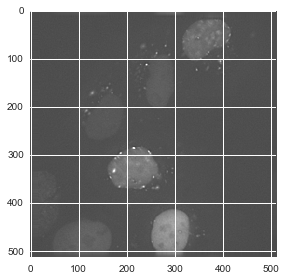

In [6]:
sio.imshow(img_rescl)
sio.imsave(dir_ + "/results/img_rescl.tif",img_rescl)
print min(img_rescl.flatten())
print max(img_rescl.flatten())

In [7]:
img_to_test = image_stack_pcna[tile_number]
#img_to_test = img_rescl

eq_hist
float64
3.81469726562e-06
1.0


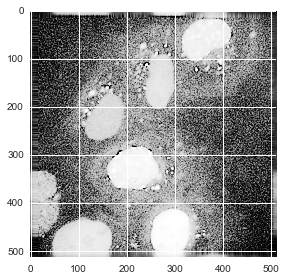

In [8]:

print 'eq_hist'
eq1 = exposure.equalize_hist(img_to_test)
sio.imshow(eq1)
print eq1.dtype
print min(eq1.flatten())
print max(eq1.flatten())


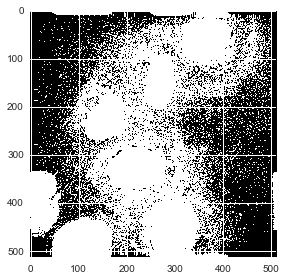

In [17]:
th = filters.threshold_otsu(eq1)
sio.imshow(eq1 > th)

clahe
float64
0.0
1.0


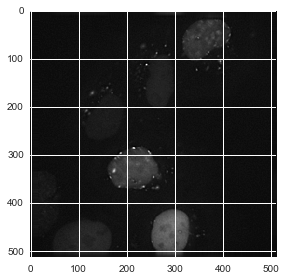

In [9]:
print 'clahe'
cl1 = exposure.equalize_adapthist(img_to_test,kernel_size=512/16, clip_limit=0.005, nbins=2**8)
sio.imshow(cl1)
print cl1.dtype
print min(cl1.flatten())
print max(cl1.flatten())

uint16
446
542


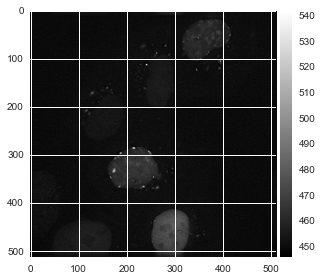

In [10]:
sg1 = exposure.adjust_sigmoid(img_to_test, cutoff=0.5, gain=10, inv=False)
sio.imshow(sg1, cmap=plt.cm.gray)
print sg1.dtype
print min(sg1.flatten())
print max(sg1.flatten())

uint16
171
2008


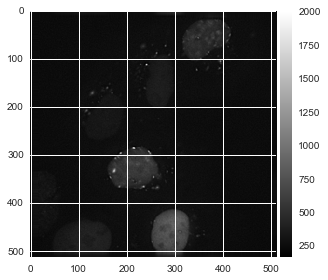

In [11]:
log1 = exposure.adjust_log(img_to_test, gain=1, inv=False)
sio.imshow(log1, cmap=plt.cm.gray)
print log1.dtype
print min(log1.flatten())
print max(log1.flatten())

uint16
119
1407


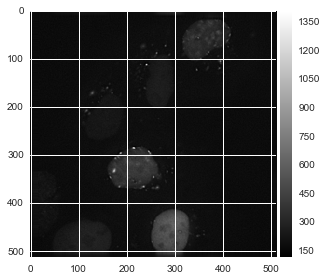

In [12]:
gm1 = exposure.adjust_gamma(img_to_test, gamma=1, gain=1)
sio.imshow(gm1, cmap=plt.cm.gray)
print gm1.dtype
print min(gm1.flatten())
print max(gm1.flatten())

float64
0.00259679800347
0.00903472599868


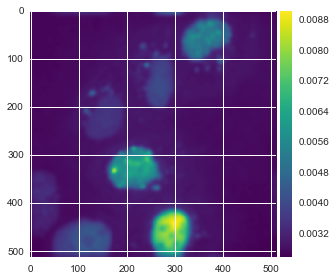

In [14]:
from skimage import filters
blur1 = filters.gaussian(img_to_test, sigma=4)
sio.imshow(blur1)
print blur1.dtype
print min(blur1.flatten())
print max(blur1.flatten())

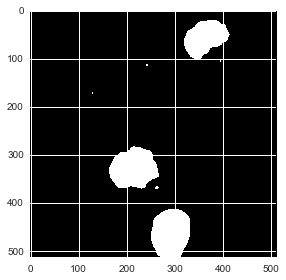

In [15]:
th = filters.threshold_otsu(blur1)
sio.imshow(blur1 > th)

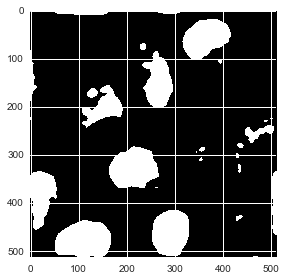

In [16]:
th_img = filters.threshold_adaptive(blur1, block_size=151, method='generic', offset=0, param=filters.threshold_otsu)
sio.imshow(th_img)

In [17]:
#blobs = blob_log(blur1, max_sigma=50,  min_sigma=40, num_sigma=10, threshold=0.01, overlap=0.5)
#blobs
img_blobs = cellseg.draw_blob_log(blur1,
                      color_stack2[tile_number],
                      with_labels = False, 
                      max_sigma=70,  
                      min_sigma=40,
                      num_sigma=50,
                      threshold=.001,
                      overlap=0.5,
                      color_blobs = (0,0,255),
                      width =1 )
#sio.imshow(img_blobs)

(512, 512, 3)


/Users/sarahkeegan/anaconda/lib/python2.7/site-packages/skimage/io/_io.py:132: UserWarning: /Users/sarahkeegan/fenyolab/data_and_results/pagano/rona/TIF/FOR_SARAH_WT_stacked//results/img.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


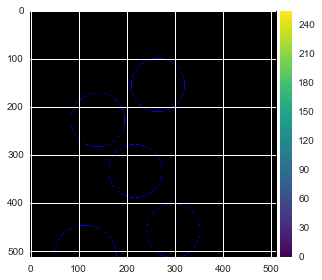

In [19]:
#img_blobs
print img_blobs.shape
sio.imsave(dir_ + '/results/img.tif',img_blobs)
sio.imshow(img_blobs)

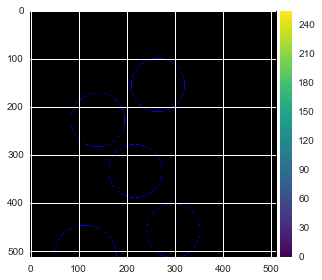

In [18]:
sio.imshow(img_blobs)